In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import tensorflow as tf

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

    🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

## Get the Data

In [4]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
# # Unzip the downloaded file
# zip_ref = zipfile.Zipfile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

    A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
    A test directory with the same structure as the train directory.



In [5]:
path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints', 'CNN_01.ipynb', 'pizza_steak', 'pizza_steak.zip']

In [6]:
# os.chdir(r'C:\Users\anmol\Desktop\TF\Udemy ZTM\4. CNN and Computer Vision\pizza_steak\train\steak')

In [7]:
# print(os.listdir())

In [8]:
len(os.listdir())

4

Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

In [9]:
os.getcwd()

'C:\\Users\\anmol\\Desktop\\TF\\Udemy ZTM\\4. CNN and Computer Vision'

In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

# Building an END to END CNN

1. Load our images
2. Preprocess our images
3. Build a CNN to find patterns in our images
4. Compile our CNN
5. Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# set random seed
tf.random.set_seed(32)

# Preprocess data (get all of the pixel values between 0 & 1, this is also called normalization)
train_datagen = ImageDataGenerator(rescale=1./225)
valid_datagen = ImageDataGenerator(rescale=1./225)

# setup path to our data directories
train_dir = r'C:\Users\anmol\Desktop\TF\Udemy ZTM\4. CNN and Computer Vision\pizza_steak\train'
test_dir = r'C:\Users\anmol\Desktop\TF\Udemy ZTM\4. CNN and Computer Vision\pizza_steak\test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer Website)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation="relu",
                                                      input_shape = (224, 224, 3)),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding="valid"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid")])


# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# # Fit the Model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 175ms/step - loss: 0.5581 - accuracy: 0.7207 - val_loss: 0.4103 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 4s 95ms/step - loss: 0.4432 - accuracy: 0.8020 - val_loss: 0.3698 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 97ms/step - loss: 0.4011 - accuracy: 0.8293 - val_loss: 0.3678 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 4s 94ms/step - loss: 0.3934 - accuracy: 0.8380 - val_loss: 0.3468 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 4s 93ms/step - loss: 0.3159 - accuracy: 0.8713 - val_loss: 0.3562 - val_accuracy: 0.8460


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

In [13]:
# get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Testing Out a basic Classification model that we built earlier for this image dataset

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all of the same parameters in our previous model except for changing two things:

1. The data - we're now working with images instead of dots.
2. The input shape - we have to tell our neural network the shape of the images we're working with.

A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [14]:
# Set random seed
tf.random.set_seed(43)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])


# compile the model
model_2.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# Fit the Model
history_2 = model_2.fit(train_data, 
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6964 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 94ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 96ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 95ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture

In [15]:
# check the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

### Trying to improve the performance by upgrading this Model

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 99ms/step - loss: 4.2850 - accuracy: 0.6440 - val_loss: 0.5693 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 5s 96ms/step - loss: 1.0411 - accuracy: 0.6860 - val_loss: 0.4455 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6022 - accuracy: 0.7340 - val_loss: 0.6056 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 4s 95ms/step - loss: 0.8870 - accuracy: 0.6840 - val_loss: 0.4511 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 4s 96ms/step - loss: 0.4973 - accuracy: 0.7733 - val_loss: 0.4200 - val_accuracy: 0.7960


Looks like our model is learning again. It got ~69% accuracy on the training set and ~69% accuracy on the validation set.

In [17]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters

Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

# Breaking Down the CNN Classifier Model

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Visualizing the Data

Image shape: (511, 512, 3)
Image shape: (512, 512, 3)


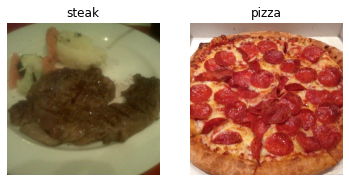

In [18]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the Data

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [19]:
# Define training and test directory paths
train_dir = r"C:\Users\anmol\Desktop\TF\Udemy ZTM\4. CNN and Computer Vision\pizza_steak\train"
test_dir = r"C:\Users\anmol\Desktop\TF\Udemy ZTM\4. CNN and Computer Vision\pizza_steak\test"

Our next step is to turn our data into **batches**.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

**A batch size of 32 is good for your health.**

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of **ImageDataGenerator** for each of our datasets.


In [20]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/225.)

**The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.**

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

**The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).**

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [21]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

1. Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
2. The **target_size** parameter defines the input size of our images in (height, width) format.
3. The **class_mode** value of **'binary'** defines our classification problem type. If we had more than two classes, we would use **'categorical'**.
4. The **batch_size** defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.

In [22]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
print(len(images))
print(len(labels))

32
32


In [23]:
# How many batches are there??
len(train_data)   # (1500/32)=46.875 (approximates to 47)

47

Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.

In [24]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647



Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

How about the labels?


In [25]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels

### 3. Create a Model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 **Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.**

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
# Create the model (this will be our baseline CNN)
model_4 = Sequential([
    Conv2D(filters = 10, # filter is the numbe of sliding windows going across an input (higher = more complex model)
          kernel_size=(3,3), # the size of the slideing windows going across an input
          strides=1, # the size of the step the sliding windows takes across an input
          padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
          activation = "relu",
          input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

1. The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
2. filters - these are the number of "feature extractors" that will be moving over our images.
3. kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
4. stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
5. padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.


What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:
1. CNN Explainer website
2. A guide to convolutional arithmetic for deep learning - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
3. For a great explanation of padding, see this Stack Overflow answer.

Now our model is ready, let's compile it.

In [29]:
# compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [30]:
# get the model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the Model

In [31]:
# check the length of train and test data generators
print(len(train_data))
print(len(test_data))

47
16


1. steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
2. validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [33]:
# fit the model
history_4 = model_4.fit(train_data, 
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 144ms/step - loss: 1.2400 - accuracy: 0.6800 - val_loss: 0.4101 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4373 - accuracy: 0.8040 - val_loss: 0.3810 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3272 - accuracy: 0.8740 - val_loss: 0.3733 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.1667 - accuracy: 0.9400 - val_loss: 0.4477 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.0662 - accuracy: 0.9840 - val_loss: 0.5203 - val_accuracy: 0.8300


### Evaluate the Model

<AxesSubplot:>

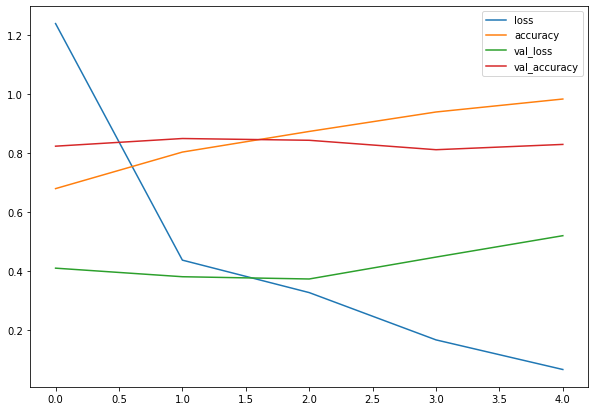

In [34]:
# plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [40]:
# plot the validation and training curve separately
def plot_loss_curves(history):
    """returns separete loss curves for training and validation metrics"""
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # plot loss
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

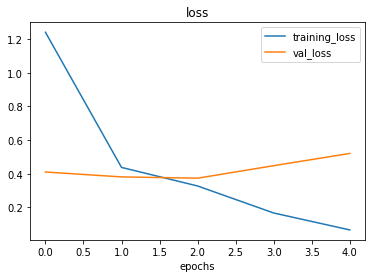

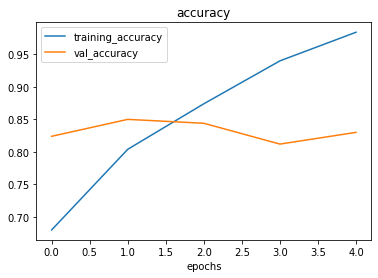

In [41]:
plot_loss_curves(history_4)

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a **model's validation loss starts to increase, it's likely that it's overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

### 6. Adjust the Model Parameters

Fitting a machine learning model comes in 3 steps:

 - Create a basline.
 - Beat the baseline by overfitting a larger model.
 - Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

   - Increase the number of convolutional layers.
   - Increase the number of convolutional filters.
   - Add another dense layer to the output of our flattened layer.
   
   
Some ways to reduce overfitting:
 - data augmentation
 - add regularization layers (such as MaxPool2d)
 - add more data..

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

   - A ConvNet with max pooling
   - A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

In [43]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [44]:
# Compile the Model
model_5.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
                metrics=["accuracy"])

# fit the model
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 147ms/step - loss: 0.6168 - accuracy: 0.6653 - val_loss: 0.4717 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4728 - accuracy: 0.7827 - val_loss: 0.3699 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4227 - accuracy: 0.8193 - val_loss: 0.3944 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3831 - accuracy: 0.8313 - val_loss: 0.3725 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3587 - accuracy: 0.8440 - val_loss: 0.3076 - val_accuracy: 0.8780


In [45]:
# get the model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

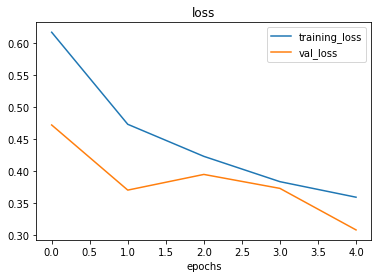

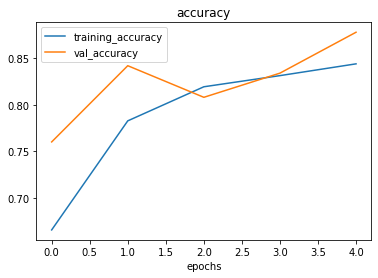

In [46]:
# plot loss curves
plot_loss_curves(history_5)

### 7. Data Augmentation (another regularization Technique)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.



Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

**To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.**

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # how much do you want toshear the image
                                             zoom_range=0.2, # zoom into the image randomly
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.**

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [67]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


🔑 **Note:** 
-  **Data augmentation is usally only performed on the training data.** 
-  Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

#### Visualizing Augmented Data

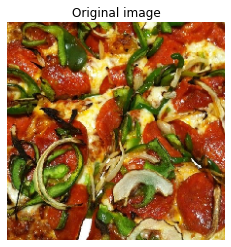

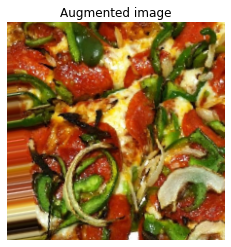

In [70]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels a

# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

🤔 **Question: Should I use data augmentation? And how much should I augment?**

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.


### Train the Model on Augmented Data

In [71]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 376ms/step - loss: 0.7096 - accuracy: 0.5007 - val_loss: 0.6864 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 16s 341ms/step - loss: 0.6906 - accuracy: 0.5567 - val_loss: 0.6522 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 16s 349ms/step - loss: 0.6749 - accuracy: 0.6053 - val_loss: 0.5598 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 16s 341ms/step - loss: 0.6141 - accuracy: 0.7047 - val_loss: 0.5178 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 16s 339ms/step - loss: 0.6025 - accuracy: 0.6973 - val_loss: 0.4855 - val_accuracy: 0.8200


**🤔 Question: Why didn't our model get very good results on the training set to begin with?**

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

**🔑 Note: One possible method to speed up dataset manipulation would be to look into TensorFlow's parrallel reads and buffered prefecting options.**



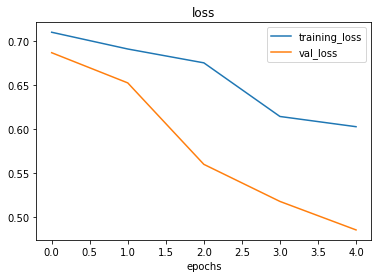

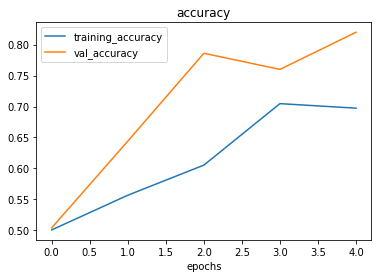

In [72]:
plot_loss_curves(history_6)



It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.


In [73]:
### Import Data and Augment it and Shuffle it
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                class_mode="binary",
                                                                batch_size=32,
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.


In [77]:
# Create the Model(same as model_5 and model_6)

model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


# compile the model
model_7.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
               metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffle,
                       epochs=5,
                       steps_per_epoch = len(train_data_augmented_shuffle),
                       validation_data= test_data,
                       validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 18s 368ms/step - loss: 0.6917 - accuracy: 0.5620 - val_loss: 0.5985 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 16s 336ms/step - loss: 0.5635 - accuracy: 0.7080 - val_loss: 0.4666 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 16s 338ms/step - loss: 0.5076 - accuracy: 0.7460 - val_loss: 0.3832 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 16s 336ms/step - loss: 0.4810 - accuracy: 0.7800 - val_loss: 0.3614 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 16s 337ms/step - loss: 0.4805 - accuracy: 0.7780 - val_loss: 0.3451 - val_accuracy: 0.8580


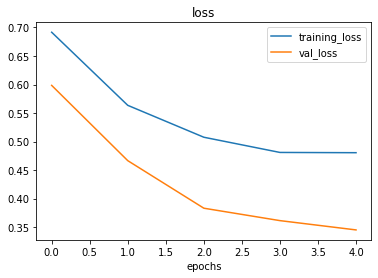

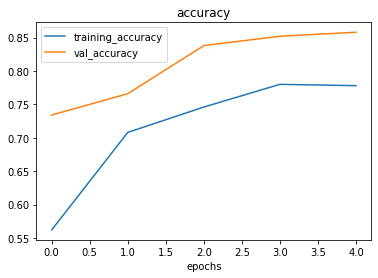

In [78]:
plot_loss_curves(history_7)

Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).


# Repeat Until Satisfied

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

 - Increase the number of model layers (e.g. add more convolutional layers).
 - Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
 - Train for longer (more epochs).
 - Finding an ideal learning rate.
 - Get more data (give the model more opportunities to learn).
 - Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning.**

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).